In [70]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [71]:
# intialize centroids 
# k is the number of clusters

'centroids = kMeans_init_centroids(X, K)'
'for iter in range(iterations):'
    # Cluster assignment step:
    # assign each data point to the closest centroid
    # idx[i] corresponds to the index of the centrpod
    # assigned to example i
'idx = find_closest_centroids(X, centroids)'
    # move centroid step:
    # compute means based on centroid assignments
'centroids = compute_means(X, idx, K)'

# The inner loop of the algorithm repeatedly carries out two steps:
# 1- assigning each training examples x^i to its closest centroids
# 2- recomputing the mean of each centroid using the points assigned to it 
# the k-means algorithm will always converge to some final set of means for the centroids, but it can be not ideal
# in practice the k-means algorithm is usually run a few times with different random initializations
# one way to choose is to choose the one with the lowest cost function value(distortion)



'centroids = compute_means(X, idx, K)'

In [72]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example

    Args: 
        X (ndarray): (m,n) input values
        centroids (ndarray): k centroids
    Returns:
        idx (array_like): (m,) closest centroids 
    """
    # set K
    K = centroids.shape[0]

    # you need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        # array to hokd distance between X[i] and each centroids[j]
        distance = []
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx


In [73]:
X = load_data()
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)
First three elements in idx are: [0 2 1]
All tests passed!


In [74]:
# given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid,
# the mean of the points that were assigned to it

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means 
    of the data points assigned to each centroid

    Args:
        X (ndarray): (m,n) data points
        idx (ndarray): (m,) array containing index of closest centroid for each
        examples in X. Concretly, idx[i] contains the index of the centroid
        closest to example i
        K (int): number of centroids
    Returns: 
        centroids (ndarray): (K, n) new centroids computed
    """

    # Useful varibales
    m, n = X.shape

    # you need to return the following variables correctly
    centroids = np.zeros((K,n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis =0)

    return centroids

In [75]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


In [76]:
def run_kMeans(X, initial_centroids, max_iters = 10, plot_progress = False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X 
    is a single example 
    """

    # initalize values
    m, n= X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # run k-measns 
    for i in range(max_iters):
        # Output progress
        print('K-Means iteration %d/%d' % (i, max_iters-1))

        # for each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx


K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


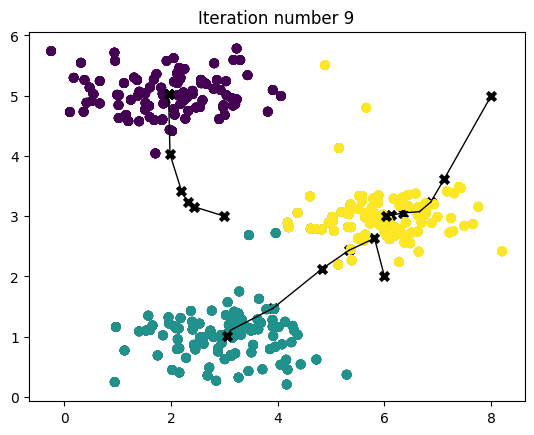

In [77]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [78]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

Shape of original_img is: (128, 128, 3)


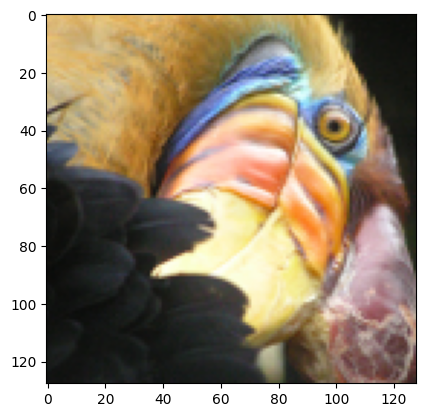

In [79]:
# apply k-means to image compression
# in a straightforwad 24-bit color representation of an image^2, each pixel is represented as three 8-bit unsigned integers
# (ranging from 0 to 255) that specify the red, green and blue intesity values. This encoding is often refered to
# as the RGB enconding. We will reduce the number of colors from thousands to 16 colors, which makes it possible to do the compression
original_img = plt.imread('bird_small.png')
plt.imshow(original_img)
print("Shape of original_img is:", original_img.shape)

# divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# each row will contain the Red, green and blue pixel values
# this gives us our dataset matrix X_img that we will use K-Means on
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))




In [80]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
Shape of idx: (16384,)
Closest centroid for the first five elements: [14  2 14 14 14]


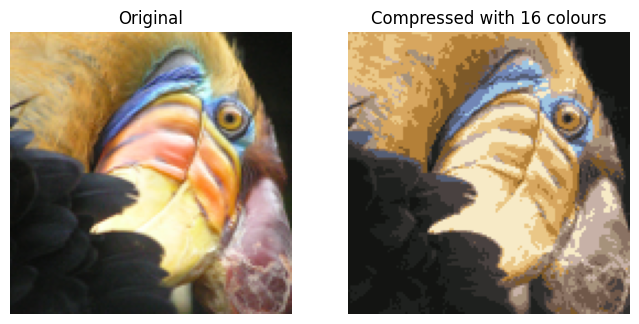

In [81]:
# represent image in terms of indices
X_recovered = centroids[idx,:]

# reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()